## Importing Required Libraries

In [213]:
import numpy as np
import pandas as pd
import os
import cv2
import csv
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

## Assigning Path for Dataset

In [209]:
data_dir = 'Datasets/GTSRB/'
train_path = 'Datasets/GTSRB/Train/'
test_path = 'Datasets/GTSRB/'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

## Mapping Sign Names to Classes

In [197]:
## Create label dictionary {label:signname}
    
labels_dict = None
with open('mapSignnamesToClass.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    labels_dict = {int(rows[0]):rows[1] for rows in reader}
    
print(labels_dict)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

## Finding Total Classes

In [5]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

# Step 1: Load The Data

## Collecting the Training Data

In [171]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


## Shuffling the training data

In [199]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## Splitting the data into train and validation set

In [200]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

# X_train = X_train/255 
# X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


## One hot encoding the labels

In [204]:
#Saving the old y_train and y_val for future use
y_train_old = np.copy(y_train)
y_val_old = np.copy(y_val)

y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(31367, 43)
(7842, 43)


## Collecting the Test Data

In [210]:
test = pd.read_csv(data_dir + 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)

# Step 2: Data Summary & Exploratory Data Analysis

## Data Size & Shape

In [212]:
n_train = len(X_train)

n_valid = len(X_val)

n_test = len(X_test)

image_shape = X_train.shape[1:]

labels_index = np.unique(y_train_old)
n_labels = len(labels_index)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of labels/classes =", n_labels)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (30, 30, 3)
Number of labels/classes = 43


## Data Visualization

### Random Image from Training Data with Label

label index and name: [ 2 ]  Speed limit (50km/h)


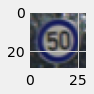

In [221]:
## Show random image and label index

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print('label index and name: [', y_train_old[index], '] ', labels_dict[y_train_old[index]])

### 25 Random Images from Test Data

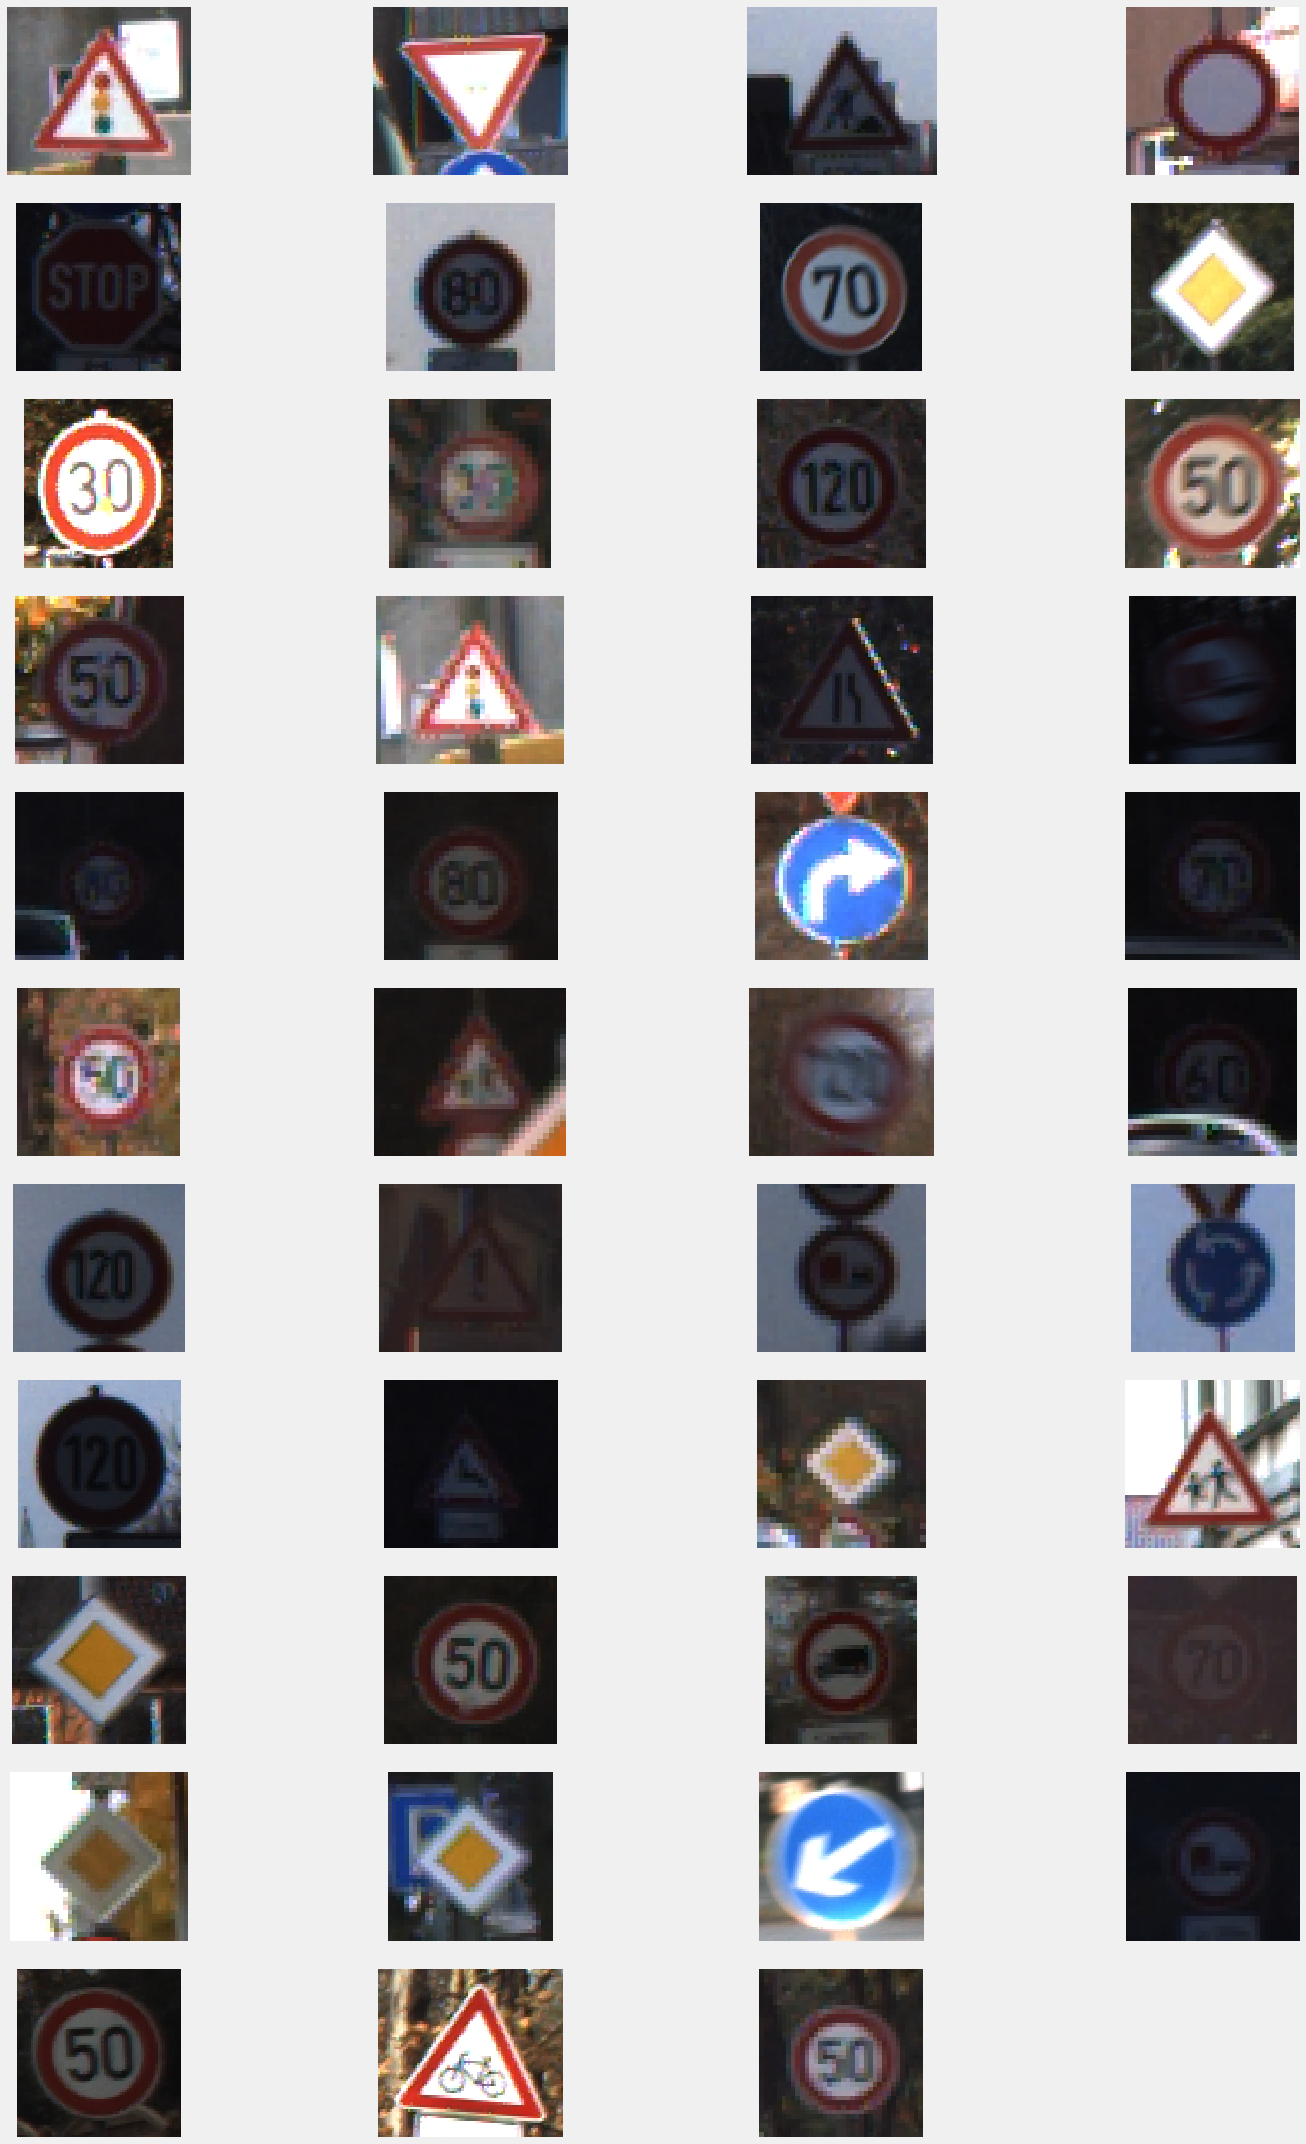

In [223]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + 'Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(22,30), tight_layout={'h_pad':2})

for i in range(NUM_CATEGORIES):
    plt.subplot(int(NUM_CATEGORIES/4)+1,4,i+1)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img, interpolation='none')
    plt.grid(visible=0)
    plt.axis('off')

### Image & Label Sample

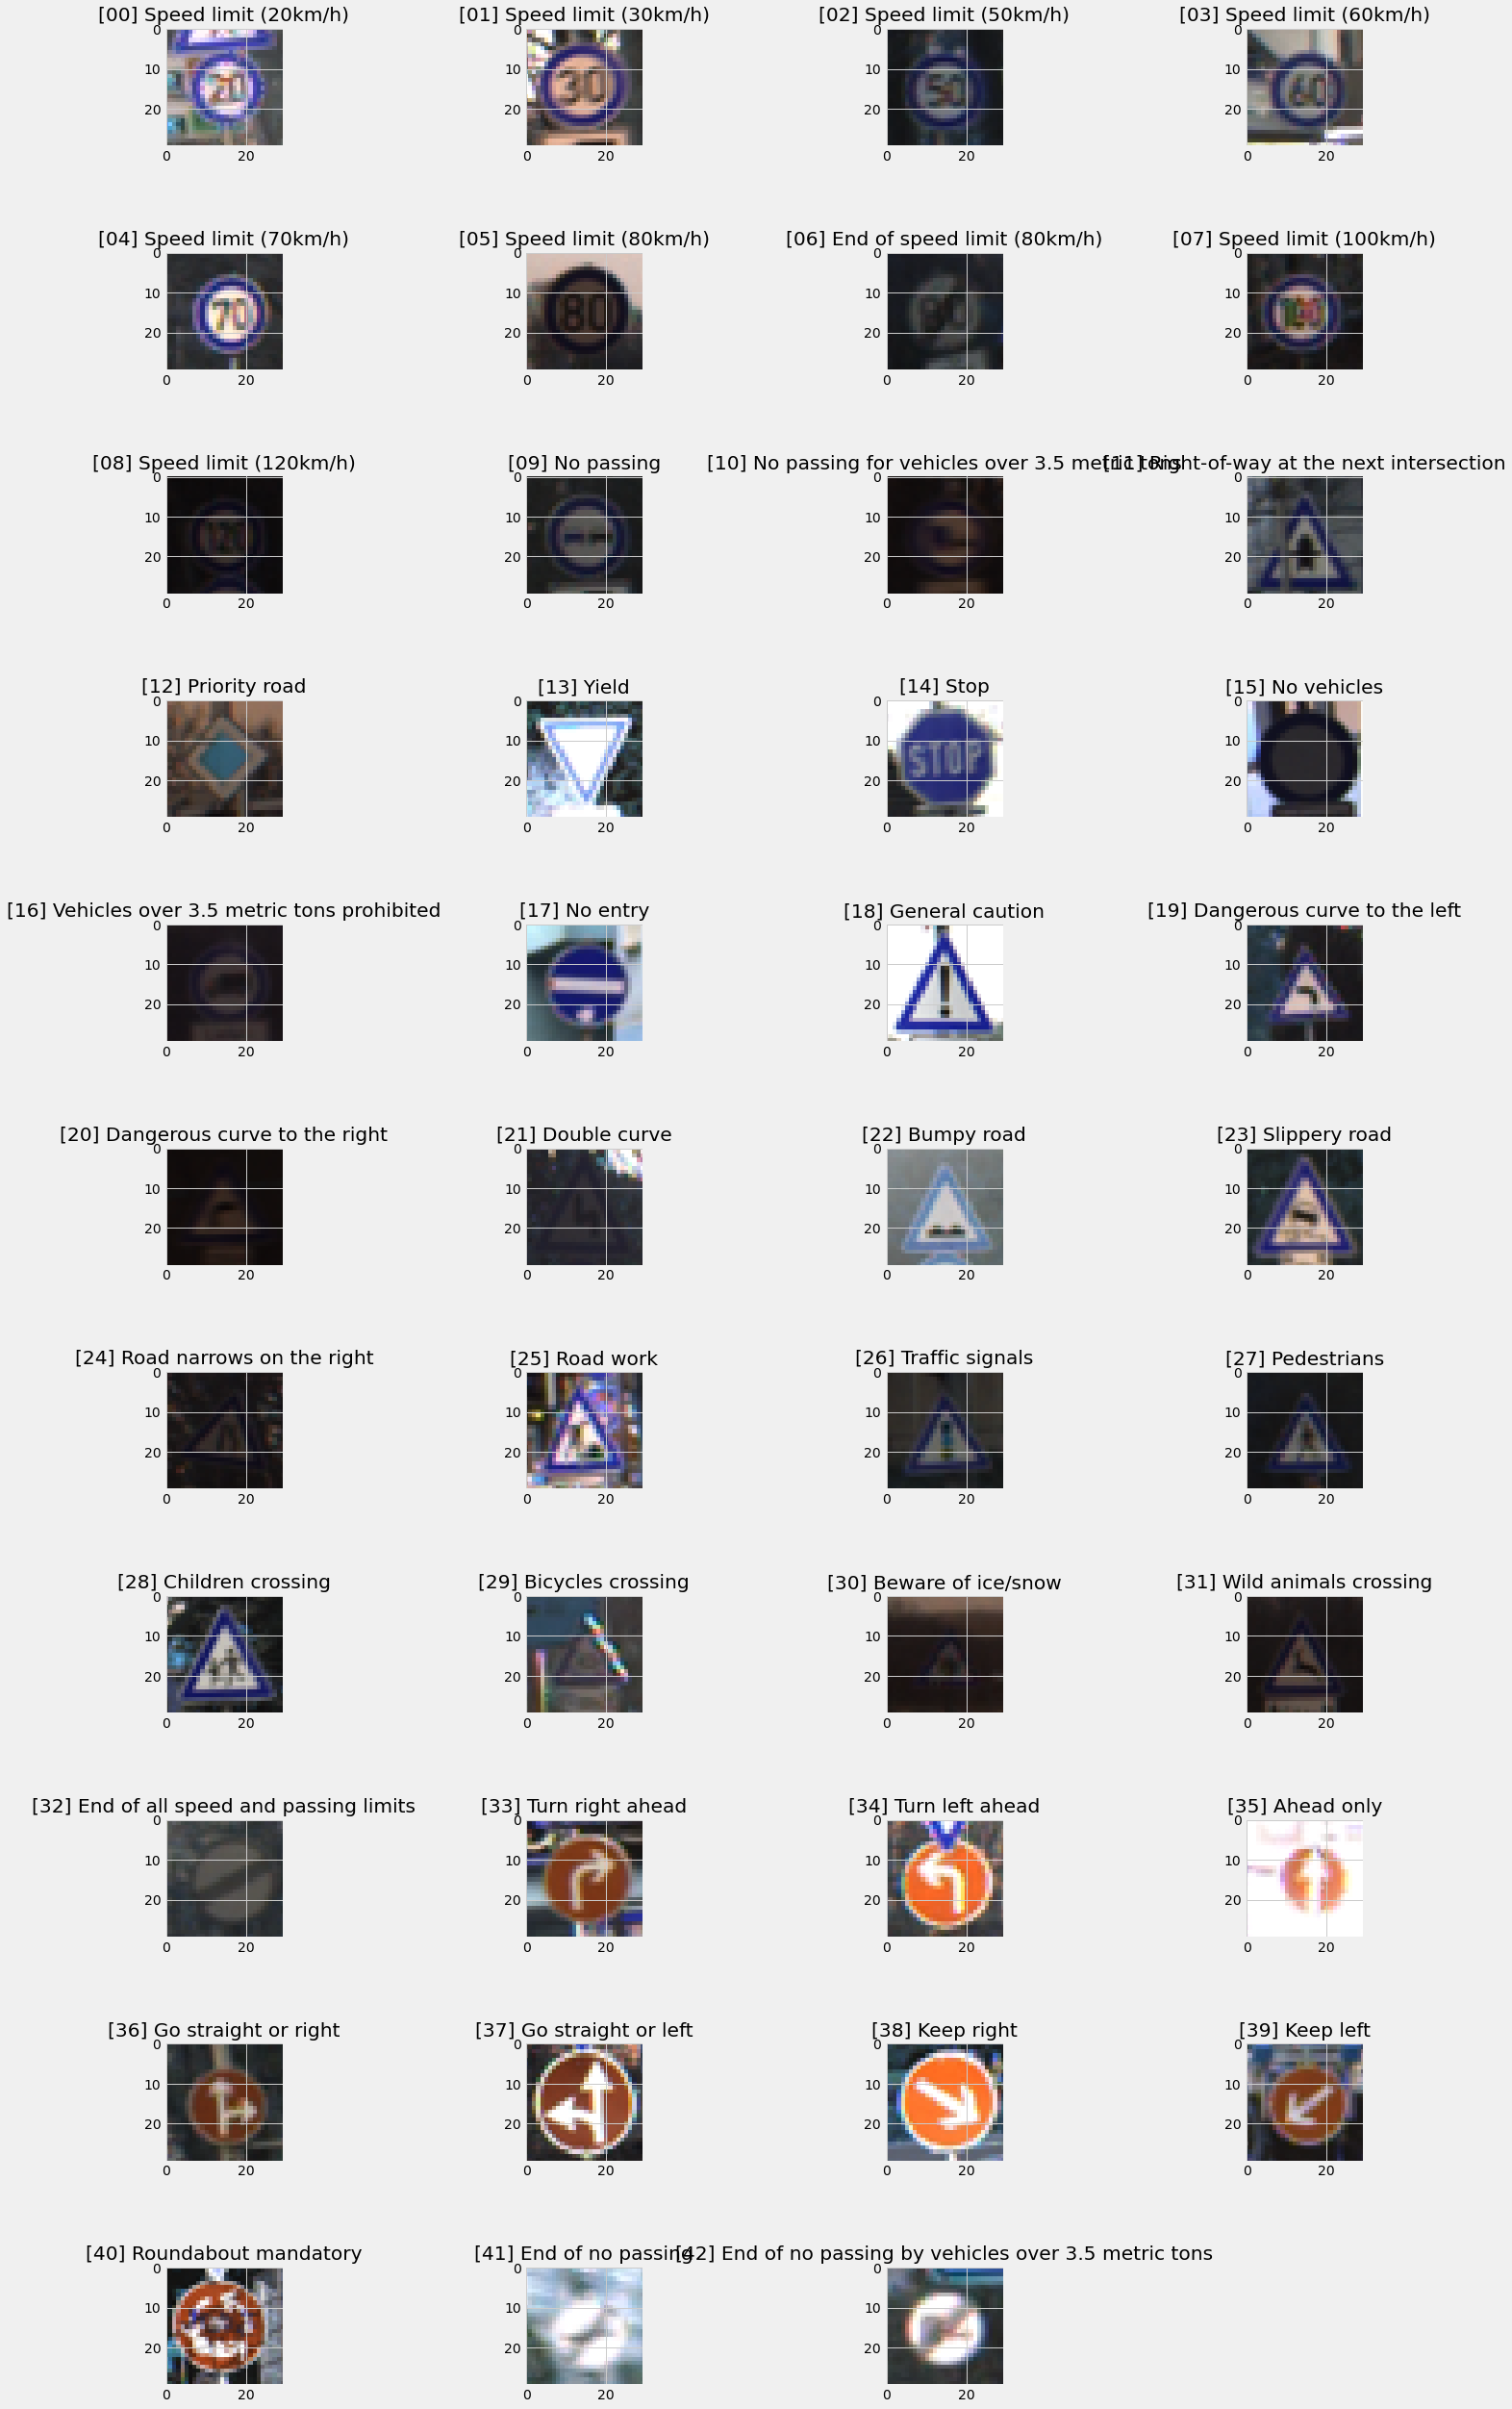

In [224]:
## Display sample of ORIGINAL training images (BEFORE preprocessing)

fig = plt.figure(figsize=(22,35), tight_layout={'h_pad':5})

for i in range(NUM_CATEGORIES):
    image_key = np.where(y_train_old==i)[0][0]
    img = X_train[image_key]
    ax = fig.add_subplot(int(NUM_CATEGORIES/4)+1,4,i+1) 
    ax.imshow(img)
    plt.title("[%02d] %s" % (i, labels_dict[y_train_old[image_key]]))
plt.show()

### Class/Label Distribution

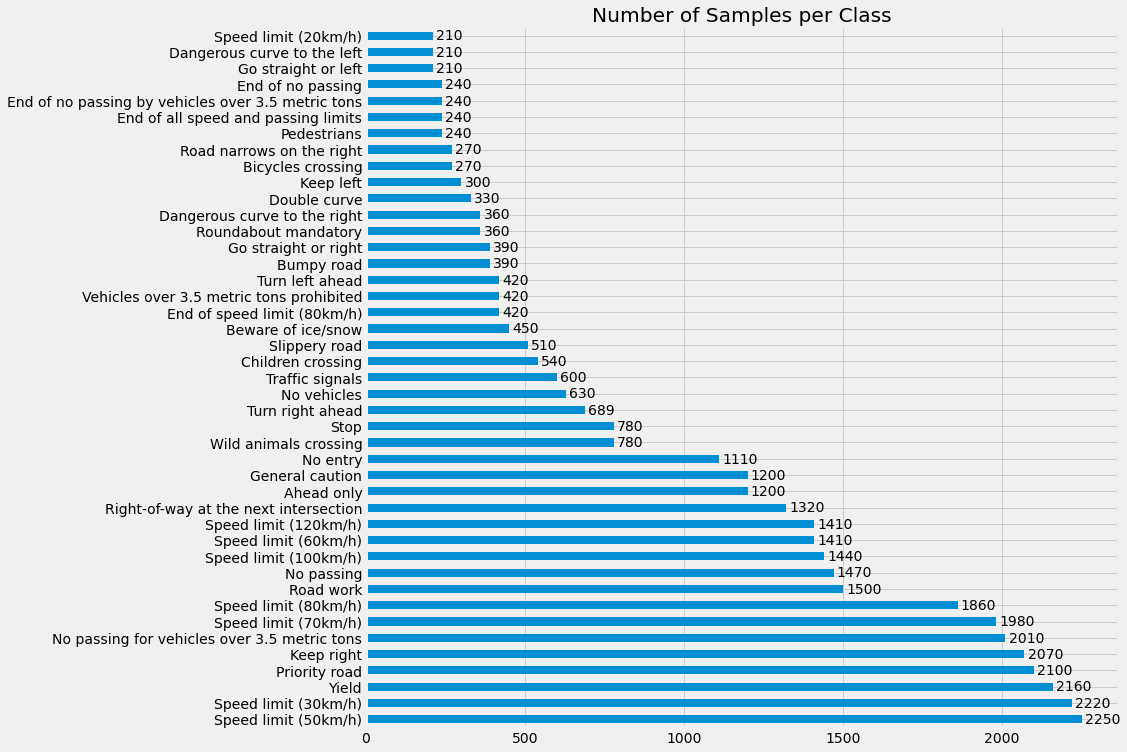

In [225]:
## Display label distribution in a histogram

y_train_df = pd.DataFrame()
y_val_df = pd.DataFrame()
y_train_df['label'] = y_train_old
y_val_df['label'] = y_val_old
y_data_df = pd.concat([y_train_df, y_val_df])
ax = y_data_df['label'].value_counts().plot(kind='barh', figsize = (12,12), title='Number of Samples per Class')
ax.set_yticklabels(list(map(lambda x: labels_dict[x], y_data_df['label'].value_counts().index.tolist())))            
for i, v in enumerate(y_data_df['label'].value_counts()):
    ax.text(v + 10, i - 0.25, str(v), color='black')